In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/it.usnak/Desktop/accounting_account.csv")
df_ledger = pd.read_csv("C:/Users/it.usnak/Desktop/accounting_ledger.csv")

In [3]:
df["OPENDATE"] = pd.to_datetime(df["OPENDATE"])
df = df.sort_values("OPENDATE")
df["time_diff"] = df["OPENDATE"].diff().dt.total_seconds() / 3600

average_freq = df["time_diff"].mean()
print("On average a new account is created every ", average_freq, " hours")

On average a new account is created every  5.927155800107844  hours


On average a new account is created about every  6  hours

In [4]:
count = df["LEDGER_F"].value_counts().head(5)
df_merged = pd.merge(df, df_ledger, left_on="LEDGER_F", right_on="LEDGER")
df_selected = df_merged[["LEDGER_F", "NAME_A_y"]]
df_filtered = df_selected[df_selected["LEDGER_F"].isin([70, 8050, 8051, 36, 1010011])]
df_filtered_unique = df_filtered.drop_duplicates(subset=["LEDGER_F", "NAME_A_y"])
print(df_filtered_unique)

      LEDGER_F                                           NAME_A_y
1           70                                 ??????????? ??????
2           70                  Ապահովագրության հետ կապված ծախսեր
159         36                        նվազագույն դեպոզիտային վճար
160         36                             Տեխնիկական պահուստներ 
5568      8050  Ապահովագրության պայմանագրերի գծով ապահովագրակա...
8436   1010011                         ՀՀ դրամ ռեզիդենտ բանկերում
9735      8051   Վերաապահովագրության պայմանագրերի գծով վերաապա...


The most frequant ledgers where
1. Ապահովագրության հետ կապված ծախսեր
2. նվազագույն դեպոզիտային վճար
3. Տեխնիկական պահուստներ
4. Ապահովագրության պայմանագրերի գծով ապահովագրական գումարներ
5. ՀՀ դրամ ռեզիդենտ բանկերում
6. Վերաապահովագրության պայմանագրերի գծով վերաապահովագրական գումարներ

In [5]:
df["OPENDATE"] = pd.to_datetime(df["OPENDATE"])
df = df.sort_values("OPENDATE")

acc_created = df.groupby(df["OPENDATE"].dt.date).size()

max_creation_day = acc_created.idxmax()
max_creation_count = acc_created.max()

print(max_creation_day, max_creation_count)

2011-12-31 8640


The day with the most account creations is 2011-12-31 with 8640 accounts created.

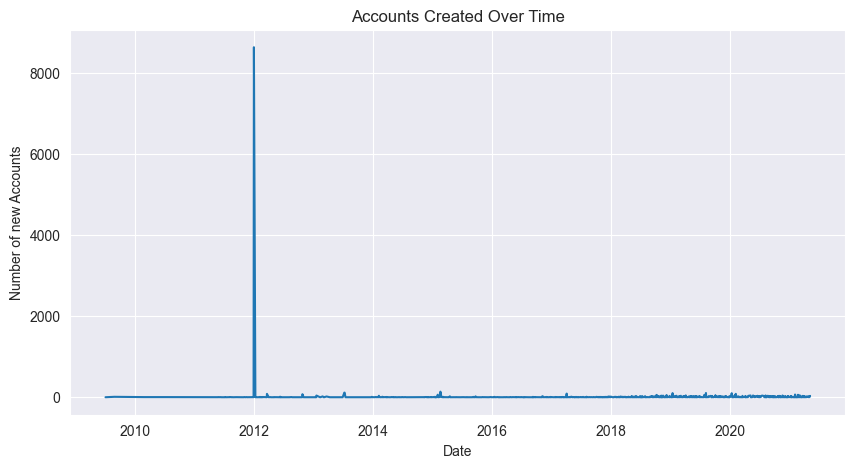

In [6]:
df["OPENDATE"] = pd.to_datetime(df["OPENDATE"])
acc_created = df.groupby(df["OPENDATE"].dt.date).size()

plt.figure(figsize = (10,5))
plt.plot(acc_created.index, acc_created.values)
plt.xlabel("Date")
plt.ylabel("Number of new Accounts")
plt.title("Accounts Created Over Time")
plt.grid(True)
plt.show()

The graph looks confusing because during 2011-12-31 were created the most accounts. That's why I filtered it to show the graph without the 2011-12-31

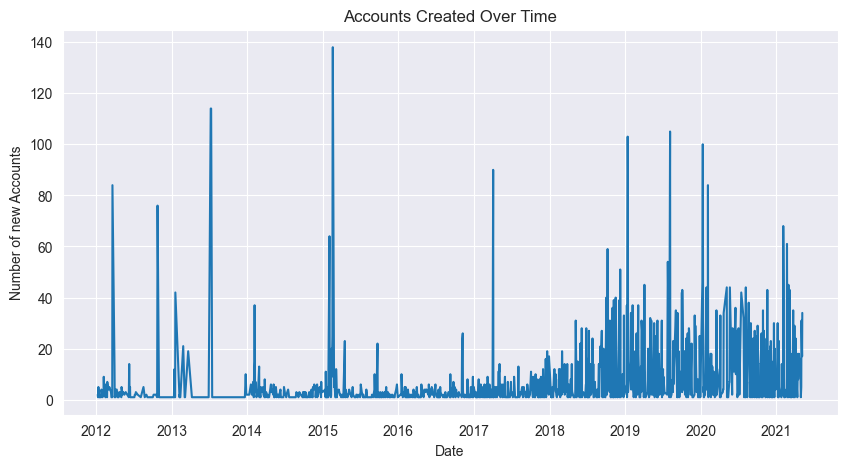

In [7]:
df["OPENDATE"] = pd.to_datetime(df["OPENDATE"])
acc_created = df.groupby(df["OPENDATE"].dt.date).size()
acc_created = acc_created[acc_created.index > pd.to_datetime('2011-12-31').date()]

plt.figure(figsize = (10,5))
plt.plot(acc_created.index, acc_created.values)
plt.xlabel("Date")
plt.ylabel("Number of new Accounts")
plt.title("Accounts Created Over Time")
plt.grid(True)
plt.show()

From the graph, we can see that over time, the frequency of new account creations has increased. Starting from 2018, there is a noticeable rise in the number of accounts being created

Potential Abandoned Accounts

In [8]:
df_user = pd.read_csv("C:/Users/it.usnak/Desktop/auth_user.csv")

df_user["last_login"] = pd.to_datetime(df_user["last_login"])
df_user["date_joined"] = pd.to_datetime(df_user["date_joined"])

abandoned_users = df_user[(df_user['last_login'].isna()) | (df_user['last_login'] == df_user['date_joined'])]
df_user['last_login'] = df_user['last_login'].dt.tz_localize(None)
inactive_users = df_user[df_user['last_login'] < pd.Timestamp.today() - pd.DateOffset(months=12)]

print(f"Abandoned accounts: {len(abandoned_users)}")
print(f"Inactive accounts (12+ months): {len(inactive_users)}")

Abandoned accounts: 11675
Inactive accounts (12+ months): 70


There are
11675 accounts that are abandoned (the user didn't Log In after registration) and
70 Inactive accounts (the user didn't Log In for more than one year)

In [9]:
df_cont = pd.read_csv("C:/Users/it.usnak/Desktop/customer_custcontract.csv")
df_customer = pd.read_csv("C:/Users/it.usnak/Desktop/customer_customer.csv")
print(df_cont.info())

df_cont["FDATE"] = pd.to_datetime(df_cont["FDATE"])
df_cont["STOPDATE"] = pd.to_datetime(df_cont["STOPDATE"])

df_cont["lifespan"] = (df_cont["STOPDATE"] - df_cont["FDATE"]).dt.days

income_per_customer = df_cont.groupby('CUST_F')['MAXPREMIUM'].sum().reset_index()
lifespan_per_customer = df_cont.groupby('CUST_F')['lifespan'].mean().reset_index()

customer_ltv = pd.merge(income_per_customer, lifespan_per_customer, on='CUST_F')
customer_ltv['LTV'] = customer_ltv['MAXPREMIUM'] / customer_ltv['lifespan']


customer_ltv = pd.merge(customer_ltv, df_customer, left_on="CUST_F", right_on="CUSTOMER")
customer_ltv = customer_ltv[['CUSTOMER', 'NAME_A', 'LTV']]

print(customer_ltv.sort_values(by='LTV', ascending=False).head(20))


C:\Users\it.usnak\AppData\Local\Temp\ipykernel_16376\3013453754.py:2: DtypeWarning: Columns (8,11,13,14,20,22,24,28,29,32,34,37,39,44,47,53,94,95,97,98,104,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer = pd.read_csv("C:/Users/it.usnak/Desktop/customer_customer.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2211 non-null   int64  
 1   CUST_F      2211 non-null   int64  
 2   CONTRACT    1110 non-null   object 
 3   FDATE       2211 non-null   object 
 4   TDATE       1 non-null      object 
 5   TAKEDATE    1 non-null      object 
 6   STOPDATE    875 non-null    object 
 7   NOTE        55 non-null     object 
 8   POLDETS     985 non-null    object 
 9   LICDATE     1011 non-null   object 
 10  LICNUM      1073 non-null   object 
 11  KIND        2211 non-null   int64  
 12  KNIQNUM     16 non-null     object 
 13  SELKIND     1142 non-null   float64
 14  PAYKIND     1142 non-null   float64
 15  PAYPERIOD   1141 non-null   float64
 16  BANKACNT    1 non-null      float64
 17  MAXPREMIUM  1142 non-null   float64
 18  PMENEGER    1042 non-null   object 
 19  COMDETID    65 non-null    

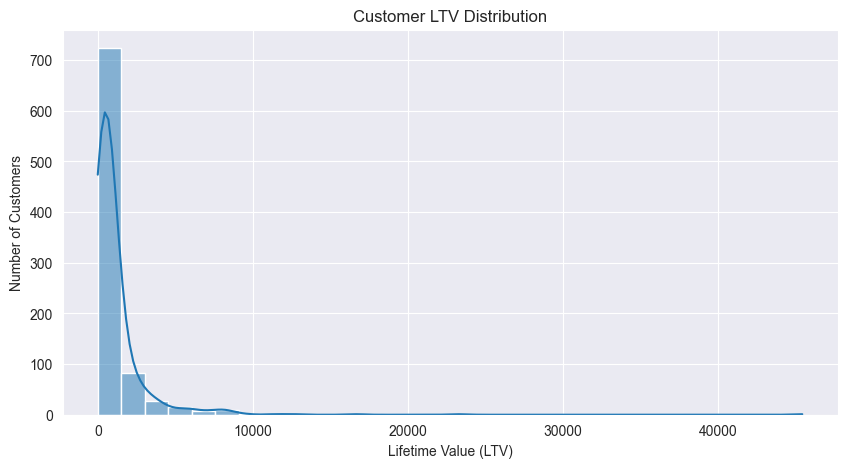

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(customer_ltv['LTV'], bins=30, kde=True)
plt.xlabel("Lifetime Value (LTV)")
plt.ylabel("Number of Customers")
plt.title("Customer LTV Distribution")
plt.show()

In [11]:
customer_premium = df_cont.groupby('CUST_F')['MAXPREMIUM'].sum().reset_index()
customer_premium.rename(columns={'MAXPREMIUM': 'total_premium'}, inplace=True)

threshold = customer_premium['total_premium'].quantile(0.90)
high_value_customers = customer_premium[customer_premium['total_premium'] >= threshold]

high_value_customers = pd.merge(high_value_customers, df_customer, left_on="CUST_F", right_on="CUSTOMER")
high_value_customers = high_value_customers[['CUSTOMER', 'NAME_A', 'total_premium']]

print("Top High-Value Customers:")
print(high_value_customers.sort_values(by='total_premium', ascending=False).head(10))


Top High-Value Customers:
     CUSTOMER                  NAME_A  total_premium
5       33324            ՄՏՍ Հայաստան     10000000.0
64     186425          Հայկյան Ընդ Քո      6000000.0
61     166155                 Վաչագան      5000000.0
111    433284         Գուդկրեդիտ ՈՒՎԿ      5000000.0
52     133977  Ա/Ձ Քրիստինե Վարդանյան      3800000.0
100    321601    ԱՁ Միսակ Շահնազարյան      3500000.0
96     309368   Ա/Ձ Արման Արզումանյան      3500000.0
4       31013              Պրես Ստենդ      3000000.0
6       34899             "Ֆինալիանս"      3000000.0
1       18300                  ԿՈՆՍԵՐ      3000000.0


In [12]:
coef = pd.read_csv("C:/Users/it.usnak/Desktop/polcont_poldcoefcst.csv")

mean_coef = coef['COEFCENT'].mean()
std_coef = coef['COEFCENT'].std()

low = mean_coef - 2 * std_coef
high = mean_coef + 2 * std_coef

unusual = coef[(coef["COEFCENT"] < low) | (coef["COEFCENT"] > high)]
print(unusual)

     ID  DETID  KIND  AGE_MIN  AGE_MAX  EXPER_MIN  EXPER_MAX  COEFCENT  PTYPE  \
4   119     32     5       80     85.0          1       15.0    1480.0      1   
33  177     49     5       80     85.0          1       15.0    1480.0      1   
58  202     55     5       80     85.0          1       15.0    1480.0      1   

    CSTRISK  
4       NaN  
33      NaN  
58      NaN  


Unusually high coefficients (but can't find from where is it because its not linked to any other files)

In [13]:
cont_freq = pd.read_csv("C:/Users/it.usnak/Downloads/cont.csv")
print(cont_freq)

   33        ՊԱՏԱՍԽԱՆԱՏՎՈՒԹՅՈՒՆ (ՏՐԱՆՍՊՈՐՏԱՅԻՆ ՄԻՋՈՑՆԵՐ)  804236
0  45   ՊԱՏԱՍԽԱՆԱՏՎՈՒԹՅՈՒՆ (ՏՐԱՆՍՊՈՐՏԱՅԻՆ ՄԻՋՈՑՆԵՐ) ASWA  323348
1  22               ԴԺԲԱԽՏ ՊԱՏԱՀԱՐՆԵՐԻՑ ԱՊԱՀՈՎԱԳՐՈՒԹՅՈՒՆ   77674
2  44  ՍՈՑԻԱԼԱԿԱՆ ՓԱԹԵԹԻ ՇԱՀԱՌՈՒՆԵՐԻ ԱՌՈՂՋՈՒԹՅԱՆ ԱՊԱՀ...   68067
3  32    ԱՐՏԱՍԱՀՄԱՆ ՄԵԿՆՈՂՆԵՐԻ ԲԺՇԿԱԿԱՆ ԱՊԱՀՈՎԱԳՐՈՒԹՅՈՒՆ   53292
4  34               ԱՌՈՂՋՈՒԹՅԱՆ ՊԵՏԱԿԱՆ ԱՊԱՀՈՎԱԳՐՈՒԹՅՈՒՆ   39243
5  23  ՀՐԴԵՀԻՑ ԵՎ ԱՅԼ ՎՏԱՆԳՆԵՐԻՑ ԳՈՒՅՔԻ ԱՊԱՀՈՎԱԳՐՈՒԹՅՈՒՆ   29415
6   5                                  Պատասխանատվության   16727
7   3        ՓՈԽԱԴՐՎՈՂ ԳՈՒՅՔԻ (ԲԵՌՆԵՐԻ) ԱՊԱՀՈՎԱԳՐՈՒԹՅՈՒՆ   14830
8  19       ԱՎՏՈՏՐԱՆՍՊՈՐՏԱՅԻՆ ՄԻՋՈՑՆԵՐԻ ԱՊԱՀՈՎԱԳՐՈՒԹՅՈՒՆ    9845


SELECT policy_polrisk."AMOUNT", policy_polrisk."RATE", "PREMIUMS", "PREMIUMSPAY", "PREMIUMSYAER", "TYPECURR", "POLID_F", "FULLNAME", policy_policy."TODATE"
FROM policy_polrisk
INNER JOIN policy_policy ON policy_polrisk."POLID_F" = policy_policy."ID"
INNER JOIN polcont_polcont ON policy_policy."CONT_F" = polcont_polcont."CONT"
INNER JOIN customer_customer ON polcont_polcont."CUSTOMER_F" = customer_customer."CUSTOMER"
WHERE "TYPECURR" = 'AMD' AND "PREMIUMS" > 100000
ORDER BY  "RATE" DESC
LIMIT 20;

In [14]:
rate = pd.read_csv("C:/Users/it.usnak/Desktop/rate_test.csv")
print(rate)

    122500.0000         100  122500.0000.1   122500.00  122500.00.1  AMD  \
0     9800000.0  100.000000       122500.0    122500.0     122500.0  AMD   
1      800000.0   64.000000       512000.0    512000.0     512000.0  AMD   
2    15329800.0   25.000000      3832450.0   3832450.0    3832450.0  AMD   
3      700000.0   18.857143       132000.0    132000.0     132000.0  AMD   
4     8740000.0   18.250000      1595050.0     43700.0      43700.0  AMD   
5    11348000.0   18.250000      2071010.0     56740.0      56740.0  AMD   
6    11348000.0   18.250000      2071010.0     56740.0      56740.0  AMD   
7     8740000.0   18.250000      1595050.0     43700.0      43700.0  AMD   
8     8740000.0   18.250000      1595050.0     43700.0      43700.0  AMD   
9    11348000.0   18.250000      2071010.0     56740.0      56740.0  AMD   
10   11348000.0   18.250000      2071010.0     56740.0      56740.0  AMD   
11    8740000.0   18.250000      1595050.0     43700.0      43700.0  AMD   
12    874000

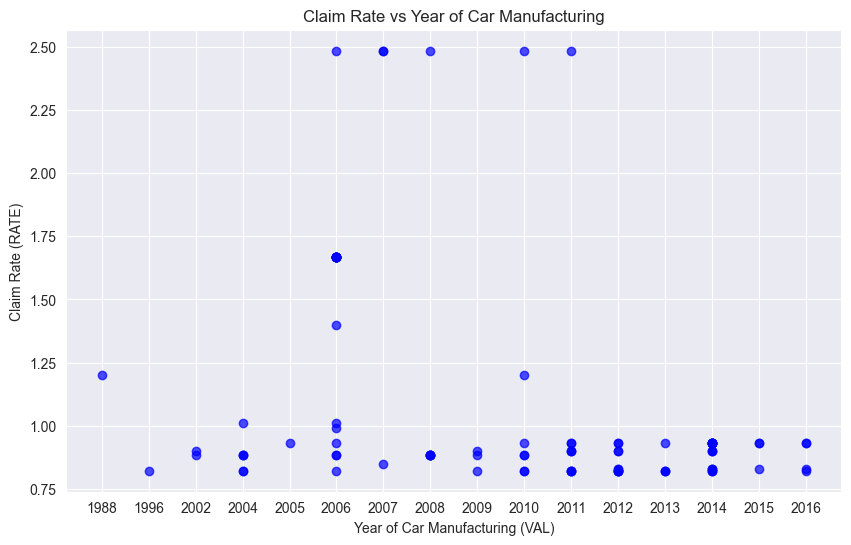

In [15]:
import psycopg2 as sql
import matplotlib.pyplot as plt
import numpy as np

conn = sql.connect("dbname='thesoft_db' user='server_api' host='192.168.100.152' password='SunLight09+!'")

cursor  =  conn.cursor()
query = """
    SELECT policy_polrisk."POLID_F", policy_polobjval."VAL",
           policy_polobjval."TAGID_F", policy_polrisk."RATE",
           policy_polrisk."AMOUNT", policy_polrisk."PREMIUMS"
    FROM policy_polrisk
    INNER JOIN policy_polobjval ON policy_polrisk."POLID_F" = policy_polobjval."POLID_F"
    WHERE policy_polobjval."TAGID_F" = 372
    ORDER BY policy_polrisk."RATE" DESC
    LIMIT 100;
"""
cursor.execute(query)
results = cursor.fetchall()

years = [row[1] for row in results]
rates = [row[3] for row in results]


cursor.close()
conn.close()

sorted_years_rates = sorted(zip(years, rates))

sorted_years, sorted_rates = zip(*sorted_years_rates)

plt.figure(figsize=(10, 6))

plt.scatter(sorted_years, sorted_rates, color='b', alpha=0.7)

plt.xlabel('Year of Car Manufacturing (VAL)')
plt.ylabel('Claim Rate (RATE)')
plt.title('Claim Rate vs Year of Car Manufacturing')
plt.grid(True)

plt.show()


The highest Claim had the cars that were manufactured from 2006 to 2011, but the most had 2007

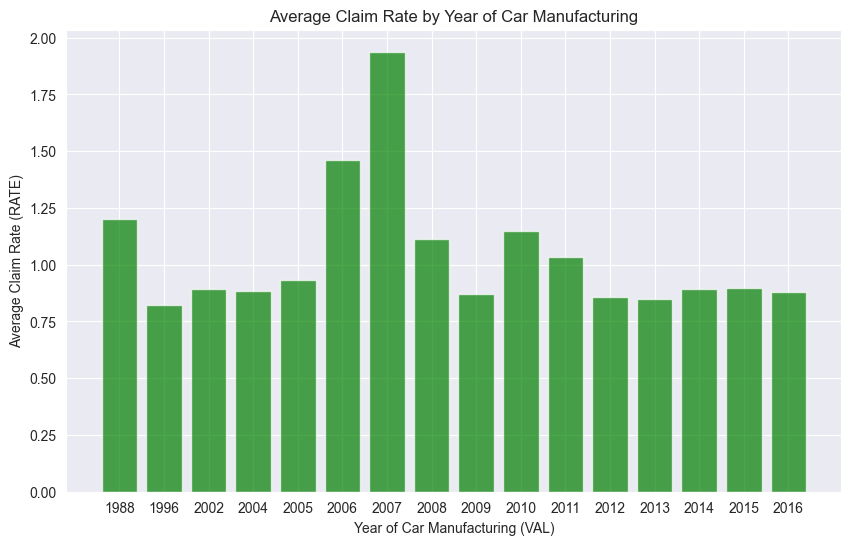

In [16]:
yearly_claims = {}
for year, rate in zip(years, rates):
    if year not in yearly_claims:
        yearly_claims[year] = []
    yearly_claims[year].append(rate)

avg_claims_by_year = {year: np.mean(rates) for year, rates in yearly_claims.items()}

sorted_years = sorted(avg_claims_by_year.keys())
avg_claims = [avg_claims_by_year[year] for year in sorted_years]

plt.figure(figsize=(10, 6))

plt.bar(sorted_years, avg_claims, color='g', alpha=0.7)

plt.xlabel('Year of Car Manufacturing (VAL)')
plt.ylabel('Average Claim Rate (RATE)')
plt.title('Average Claim Rate by Year of Car Manufacturing')
plt.grid(True)

plt.show()

This is the average claim rate per year, and as you can see the highest claims had been from the cars that were made in 2007

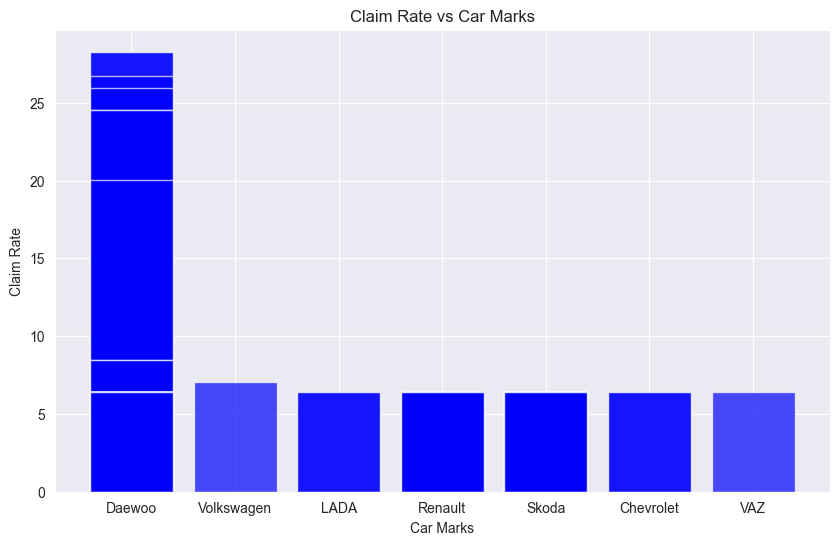

In [17]:
conn = sql.connect("dbname='thesoft_db' user='server_api' host='192.168.100.152' password='SunLight09+!'")

cursor  =  conn.cursor()
query = """SELECT policy_polrisk."POLID_F", policy_polobjval."VAL", policy_polobjval."TAGID_F",  policy_polrisk."RATE",  policy_polrisk."AMOUNT",  policy_polrisk."PREMIUMS"
FROM policy_polrisk
INNER JOIN policy_polobjval ON policy_polrisk."POLID_F" = policy_polobjval."POLID_F"
WHERE "TAGID_F" = 386
ORDER BY "RATE" DESC
LIMIT 50;
"""
cursor.execute(query)
results = cursor.fetchall()

car_mark = [row[1] for row in results]
rates = [row[3] for row in results]

cursor.close()
conn.close()

plt.figure(figsize=(10, 6))

plt.bar(car_mark, rates, color='blue', alpha=0.7)

plt.xlabel('Car Marks')
plt.ylabel('Claim Rate')
plt.title('Claim Rate vs Car Marks')
plt.grid(True)

plt.show()

The highest claims had the Daewoo car mark

In [18]:
import sqlite3 as sql
import matplotlib.pyplot as plt
from collections import defaultdict


conn = sql.connect("dbname='thesoft_db' user='server_api' host='192.168.100.152' password='SunLight09+!'")
cursor = conn.cursor()


query = """
    SELECT policy_polrisk."POLID_F", policy_polobjval."VAL", policy_polrisk."RATE"
    FROM policy_polrisk
    INNER JOIN policy_polobjval ON policy_polrisk."POLID_F" = policy_polobjval."POLID_F"
    WHERE policy_polobjval."TAGID_F" = 386
"""
cursor.execute(query)
results = cursor.fetchall()


car_data = defaultdict(lambda: {'total_rate': 0, 'count': 0})


for _, car_mark, rate in results:
    car_data[car_mark]['total_rate'] += rate
    car_data[car_mark]['count'] += 1

average_rates = {mark: data['total_rate'] / data['count'] for mark, data in car_data.items()}

sorted_data = sorted(average_rates.items(), key=lambda x: x[1], reverse=True)
car_marks, avg_rates = zip(*sorted_data)

cursor.close()
conn.close()


plt.figure(figsize=(12, 6))
plt.bar(car_marks, avg_rates, color='blue', alpha=0.7)
plt.xlabel('Car Marks')
plt.ylabel('Average Claim Rate')
plt.title('Average Claim Rate vs Car Marks')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

OperationalError: no such table: policy_polrisk